In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']

data = pd.read_csv('processed.cleveland.data', header=None, names=columns)

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
ca = thal = 0
for i in data.values:
    if i[11]=='?':
        ca+=1
    if i[12]=='?':
        thal+=1
print(ca, thal)

4 2


In [6]:
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.astype(float)

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    float64
dtypes: float64(14)
memory usage: 34.8 KB


In [9]:
target = 'target'
X = data.drop(target, axis=1)
y = data[target]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
# model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.65


In [12]:
import joblib

In [13]:
file_name = 'Decision_Tree.sav'
joblib.dump(model, file_name)

['Decision_Tree.sav']

In [14]:
predicted = model.predict(x_test)
for real, pred in zip(y_test, predicted):
    print(f"Real: {real}, Predicted: {pred}")

Real: 0.0, Predicted: 0.0
Real: 3.0, Predicted: 3.0
Real: 2.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 1.0, Predicted: 0.0
Real: 1.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 2.0, Predicted: 2.0
Real: 2.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 3.0, Predicted: 3.0
Real: 3.0, Predicted: 0.0
Real: 1.0, Predicted: 3.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 2.0
Real: 3.0, Predicted: 1.0
Real: 0.0, Predicted: 0.0
Real: 1.0, Predicted: 0.0
Real: 3.0, Predicted: 1.0
Real: 3.0, Predicted: 2.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 1.0, Predicted: 0.0
Real: 3.0, Predicted: 3.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 1.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 0.0, Predicted: 0.0
Real: 1.0, P

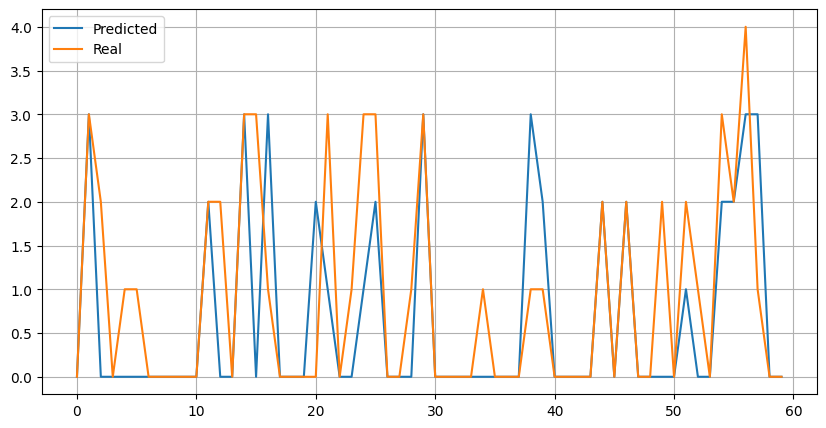

In [15]:
predictions = model.predict(x_test)
yt = y_test.reset_index(drop=True)
plt.figure(figsize=(10,5))
plt.plot(predictions, label='Predicted')
plt.plot(yt, label='Real')
plt.legend()
plt.grid()
plt.show()

In [16]:
model2 = RandomForestClassifier(n_estimators=300, max_depth=3, max_features="sqrt", random_state=99)
model2.fit(x_train, y_train)
score = model2.score(x_test, y_test)
print(score)

0.6166666666666667
